# Project Name - Iris Flower Classification - lgmvip task1


### Project Summary

#### Project Overview:
The Iris Flower Classification project aims to develop a machine learning model capable of accurately classifying iris flowers into their respective species based on specific measurements. The three species—setosa, versicolor, and virginica—each have unique measurement characteristics.

#### Objective:
The main objective is to utilize machine learning techniques to create a model that can reliably determine the species of an iris flower based on its measurements. This model will automate the classification process, providing an efficient method for identifying iris species.

#### Key Project Details:
- The project deals with three iris species: setosa, versicolor, and virginica.
- These species are distinguishable through measurements like sepal length, sepal width, petal length, and petal width.
- A machine learning model will be trained using a dataset that includes these measurements along with their corresponding species.
- The trained model will then be used to classify iris flowers into one of the three species based on the given measurements.

# 1. Know the data

In [17]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
# Inspect the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [7]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


The output of df.info() shows that the dataset has 150 entries with no missing values. The dataset contains 5 columns: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), and species.

In [5]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:
# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


Great! The output confirms that there are no missing values in the dataset. Let's proceed with the next steps.

## Dataset Overview
### Structure of the Dataset:

The dataset contains 150 entries (rows) and 5 columns.
The columns are:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
species
### Data Types:

The features (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)) are of type float64.
The target variable (species) is of type int64.
### Missing Values:

There are no missing values in the dataset.
### Descriptive Statistics:
#### Sepal Length:
Mean: 5.84 cm
Standard Deviation: 0.83 cm
Minimum: 4.3 cm
Maximum: 7.9 cm
#### Sepal Width:
Mean: 3.06 cm
Standard Deviation: 0.44 cm
Minimum: 2.0 cm
Maximum: 4.4 cm
#### Petal Length:
Mean: 3.76 cm
Standard Deviation: 1.77 cm
Minimum: 1.0 cm
Maximum: 6.9 cm
#### Petal Width:
Mean: 1.20 cm
Standard Deviation: 0.76 cm
Minimum: 0.1 cm
Maximum: 2.5 cm
#### Species:
The target variable is encoded as integers (0, 1, 2), representing the three species of iris flowers.

## 2. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [10]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

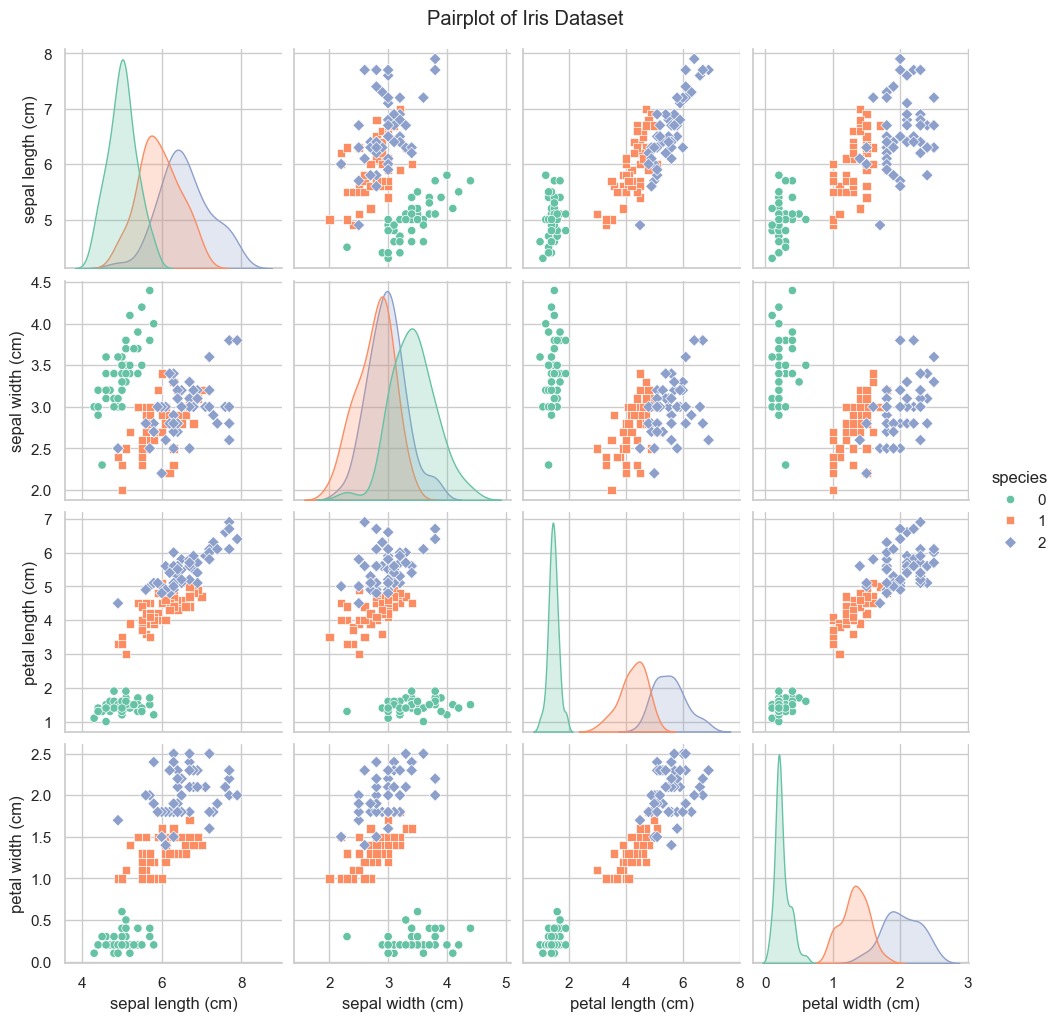

In [11]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette="Set2")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

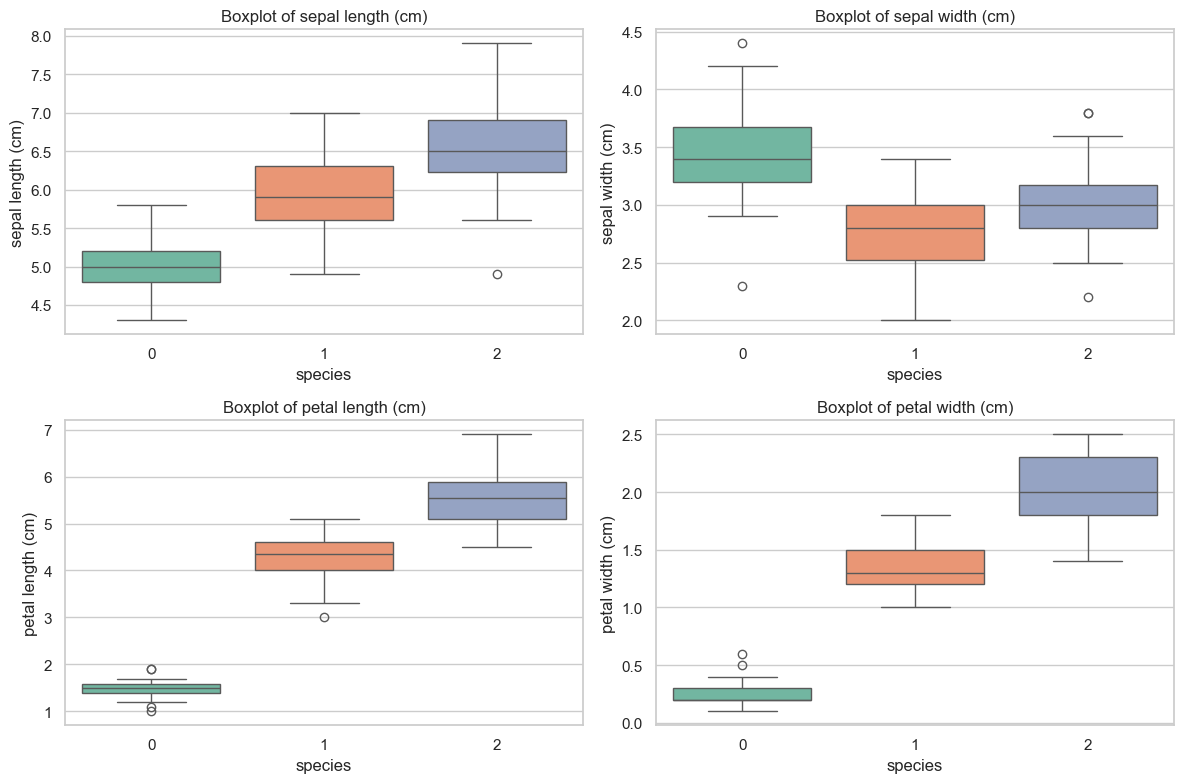

In [13]:
# Boxplot to understand the distribution of each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df, hue='species', palette="Set2", legend=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

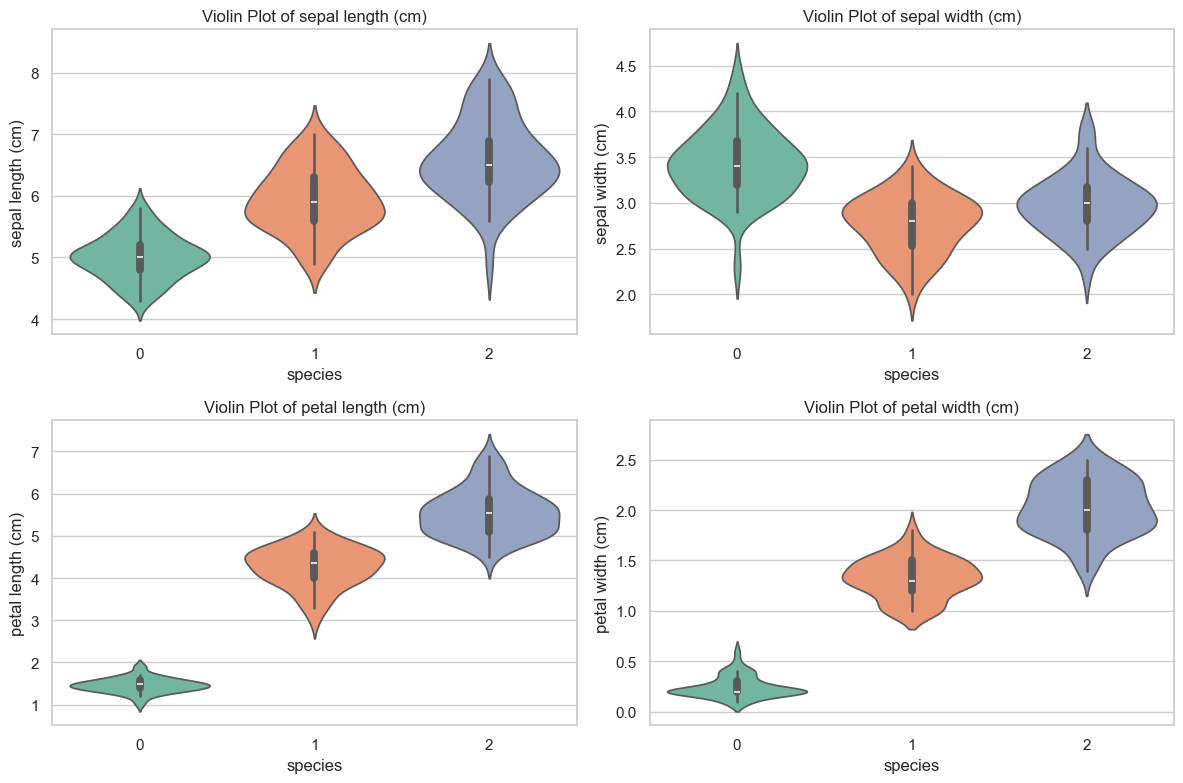

In [15]:
# Violin plot to understand the distribution and density of each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='species', y=column, data=df, hue='species', palette="Set2", legend=False)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

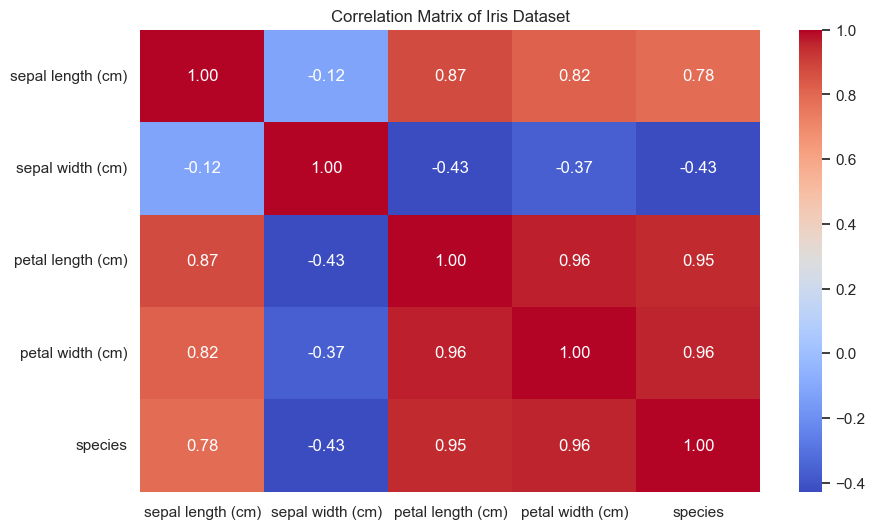

In [16]:
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

## Preprocess the Data

In [18]:

# Standardize the features
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Display the first few rows of the standardized data
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [19]:
# Split the data into training and testing sets
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Model

In [20]:
# Train a classification model (Logistic Regression in this case)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:

# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [25]:
# Make predictions on new data (optional)
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example new data
new_data_df = pd.DataFrame(new_data, columns=iris.feature_names)  # Convert to DataFrame with feature names
new_data_scaled = scaler.transform(new_data_df)  # Scale the new data
prediction = model.predict(new_data_scaled)  # Predict the class
print(f"Predicted class: {iris.target_names[prediction][0]}")  # Print the predicted class

Predicted class: setosa


/opt/anaconda3/envs/iris_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
